## **Two-sample t-test**

The two-sample t-test is used to check whether the normally distributed populations behind two independent datasets have the same expected value.


### <ins>Defining the conditions<ins>

First, we import the module and create the datasets. The datasets needs to be in a pandas dataframe, thus pandas needs to be imported as well:

In [1]:
import colibripy.stats.parametric.t_test as tt
import pandas as pd

dataset_1 = [1.4, -0.3, 2.2, 2.7, 2.7, 0.1, 1.1, 3.2, 1.9, 1.3, -0.2, -0.1, 1.0, 1.5, 0.7, 2.1, 2.9, 0.5, 1.0, 2.1]
dataset_2 = [2.3, 1.1, 0.9, 1.5, 1.2, 1.6, 0.2, 1.4, 2.2, 1.4]
sample_1 = pd.DataFrame(dataset_1)
sample_2 = pd.DataFrame(dataset_2)


Now we can initiate the evaluation by defining the conditions of the t-test. It is a two-sample t-test with unpaired (independent) samples, thus we need the `UnpairedSamples` module. Here, we perform a **'two-sided'** test at **0.05** significance level. Also, we assume that the two populations have equal variances, thus we use a pooled standard deviation in the calculations by defining `pooling=True`:

In [2]:
conditions = tt.UnpairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.05,
    type="two-sided",
    pooling=True,
)

The `alpha` only affects the calculated confidence limits, and of course the decision about the nullhypothesis when we compare it to the p-value.

### <ins>Changing the conditions<ins>

We may want to change the conditions, for example to see 90% confidence interval instead of the 95%, or do a one-sided test instead of a two-sided. We can do that without redefining every conditions:

In [3]:
print(conditions.alpha, "and", conditions.type)
conditions.alpha = 0.1
conditions.type = "one-sided"
print(conditions.alpha, "and", conditions.type)

0.05 and two-sided
0.1 and one-sided


### <ins>Performing the test<ins>

#### *Two-sided test*

Let's perform a **'two-sided'** test at **0.05** significance level:

In [4]:
conditions = tt.UnpairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.05,
    type="two-sided",
    pooling=True,
)
results = conditions.test()
results

,mean1,mean2,std1,std2,std_pooled,diff_means,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,1.39,1.38,1.072577,0.606996,0.948194,0.01,0.367234,0.027231,-0.742244,0.762244,0.978469


`.test()` gives the results of the evaluation in a form of a pandas dataframe. The 'mean1' and 'std1' is the mean and the standard deviation of sample_1, 'mean2' and 'std2' is the mean of sample_2, 'std_pooled' is the pooled standard deviation, 'diff_means' is the difference between the means of the samples, 'ste' is the standrd error of the difference, 'test_statistic' is the calculated test statistic, and the lower and upper confidence limits (CL) give the interval within which the expected value of the difference can be found with 1-`alpha` probability (95% in this case).

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the expected values of the populations can be equal.

The values in the table can be called using the column names, for example:

In [5]:
results["p-value"]

0    0.978469
Name: p-value, dtype: float64

or

In [6]:
results["p-value"].item()

0.9784689632651857

<br/>
Performing the test without pooling:

In [7]:
conditions = tt.UnpairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.05,
    type="two-sided",
    pooling=False,
)
results = conditions.test()
results

,mean1,mean2,std1,std2,diff_means,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,1.39,1.38,1.072577,0.606996,0.01,0.30719,0.032553,-0.619869,0.639869,0.974267


It gives the same terms except for the 'std_pooled' as no pooled standard deviation is used during the calculations.

<br/>

#### *One-sided test*

Let's perform a **'one-sided'** test at **0.1** significance level, and it is tested whether the expected value of sample_1 is **greater** or equal to the expected value of sample_2. The greater or equal part is defined in the `.test()`:

In [8]:
conditions = tt.UnpairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.1,
    type="one-sided",
    pooling=True,
)
results = conditions.test(">")
results

,mean1,mean2,std1,std2,std_pooled,diff_means,ste,test_statistic,90.0% upper CL,p-value
0,1.39,1.38,1.072577,0.606996,0.948194,0.01,0.367234,0.027231,1.872004,0.510766


`.test(">")` gives the results of the evaluation in a form of a pandas dataframe. The 'mean1' and 'std1' is the mean and the standard deviation of sample_1, 'mean2' and 'std2' is the mean of sample_2, 'std_pooled' is the pooled standard deviation, 'diff_means' is the difference between the means of the samples, 'ste' is the standrd error of the difference, 'test_statistic' is the calculated test statistic, and the upper confidence limit (CL) gives the biggest value that if assigned to the mean of sample_2, the nullhypothesis is on the verge of acceptance. 

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the expected value of sample_1 can be greater than or equal to the expected value of sample_2.

The values in the table can be called using the column names, for example:

In [9]:
results["p-value"]

0    0.510766
Name: p-value, dtype: float64

or

Let's test if the expected value of the sample_1 is smaller than or equal than the expected value of sample_2:

In [10]:
conditions = tt.UnpairedSamples(
    sample_1=sample_1,
    sample_2=sample_2,
    alpha=0.1,
    type="one-sided",
    pooling=True,
)
results = conditions.test("<")
results

,mean1,mean2,std1,std2,std_pooled,diff_means,ste,test_statistic,90.0% lower CL,p-value
0,1.39,1.38,1.072577,0.606996,0.948194,0.01,0.367234,0.027231,0.907996,0.489234


We cannot reject the nullhypothesis at 0.1 significance level, that is, the expected value of the sample can be smaller than or equal to the expected value of sample_2. 

### <ins>Plotting the data<ins>

The boxplot of the datasets can be plotted as follows:

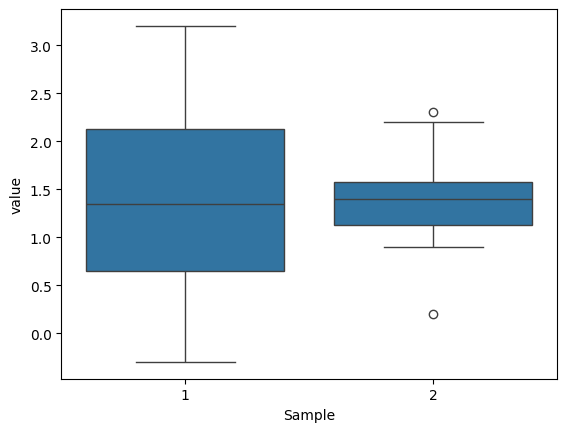

In [11]:
conditions.plot()

### <ins>Residual analysis<ins>

The residuals can only be called, if `.test()` was called already. The residuals, that is the differences between the values and the corresponding sample mean can be obtained as:

In [12]:
conditions.residuals
# separately the residuals for sample_1 can be obtained with conditions.residuals.loc['res1']
# and for sample_2 with conditions.residuals.loc['res2']

residuals
res1 0        0.01
     1       -1.69
     2        0.81
     3        1.31
     4        1.31
     5       -1.29
     6       -0.29
     7        1.81
     8        0.51
     9       -0.09
     10      -1.59
     11      -1.49
     12      -0.39
     13       0.11
     14      -0.69
     15       0.71
     16       1.51
     17      -0.89
     18      -0.39
     19       0.71
res2 0        0.92
     1       -0.28
     2       -0.48
     3        0.12
     4       -0.18
     5        0.22
     6       -1.18
     7        0.02
     8        0.82
     9        0.02

The assumption of the residuals following a normal distribution can be checked by residual plots (QQ plot at the left and histogram of the residuals at right):

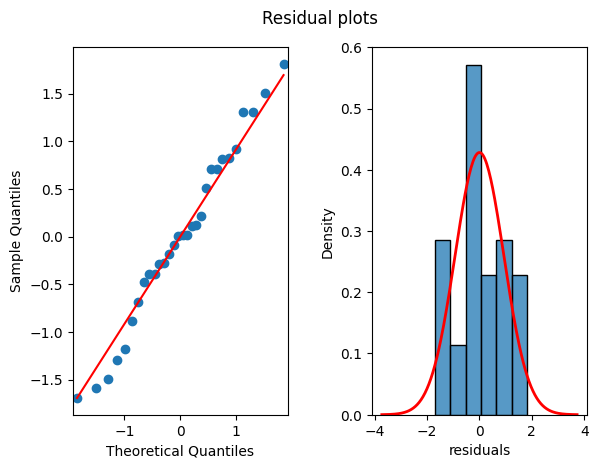

In [13]:
conditions.residual_plot()

Normality test can also be conducted. The following method uses the Shapiro Wilk test:

In [14]:
conditions.normality()

{'p-value': 0.7033179694925794}

or

In [15]:
conditions.normality()["p-value"]

0.7033179694925794

The normality test is automatically performed when `.test()` is called. If the p-value is lower than 0.05, that is we would reject the nullhypothesis of normality at 0.05 significance level, a warning message is generated automatically. For example:

In [16]:
sample_1_nonnormal = pd.DataFrame([1, 1, 10])
sample_2_nonnormal = pd.DataFrame([1, 1, 10])
conditions_nonnormal = tt.UnpairedSamples(
    sample_1=sample_1_nonnormal,
    sample_2=sample_2_nonnormal,
    alpha=0.05,
    type="two-sided",
)
conditions_nonnormal.test()

╒═══════════════════════════════════════════════════════════════════════════════════════════╕
│                                         Warning:                                          │
╞═══════════════════════════════════════════════════════════════════════════════════════════╡
│ The p-value of the Shapiro-Wilk normality test of the residuals is 0.0013507528509294285. │
│     Normality of the residuals is not fulfilled, nonparametric test may be preferred.     │
╘═══════════════════════════════════════════════════════════════════════════════════════════╛



,mean1,mean2,std1,std2,std_pooled,diff_means,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,4.0,4.0,5.196152,5.196152,5.196152,0.0,4.242641,0.0,-11.779459,11.779459,1.0
